<a href="https://colab.research.google.com/github/jeslin09/AI-Agent/blob/main/YOLOv8%20Object%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Questions to be answered:
1. Are you adding any augmentations to the dataset. If yes, then which ones and why. If not, then why not?
Ans. Yes, by default YOLOv8 applies augmentation during training and since we are not disbaling them, they are being applied.
     Augmentations applied are flip, scale, transalate, auto augmentation sucg as transformations in contrast, brightness hue etc and finally erasing.
     These augmentations are applied to expose the model to various data to adapt to variations.

2. How many epochs are you using for this dataset training?
Ans. 45. I was hitting runtime exhaustion trying to reach 50.

3. List any other hyperparameters you are specifying while training. Give reasoning for same.
Ans. Hyperparameters used:
   a. epochs=45: 45 epochs allow enough time for learning without cause for overfitting.
   b. imgsz=1024: 1024x1024 size gives good resolution also keeping processing easy to manage.
   c. batch=16: Batch size of 16 fits well within memory + Generally good for GPU.
   d. optimizer='SGD': SGD is relaible. Updates model's parameter iteratively based on gradients.
   e. patience=10: Stops training if no improvement after 10 epochs to save time.
   f. val=True: Validation after each epoch tracks performance and prevents overfitting.

4. What output metrices are you analysing. Share concrete results from those
Ans. The metrices analysed are: recall, precision, mAP50 and likely F1 confidence.
   After Training and Validation
          Precision: 0.79(Accuracy of postive predictions)
          Recall: 0.74 (Measures actual positives)
          mAP50:0.744(Mean Average Precision at 50% threshold)
          F1: 0.764(mean of precision and recall)
  After testing on a new dataset
          Precision: 0.85
          Recall: 0.635
          mAP50(B)': 0.758
          F1-Score: 0.72


'''

"Questions to be answered:\n1. Are you adding any augmentations to the dataset. If yes, then which ones and why. If not, then why not?\nAns. Yes, by default YOLOv8 applies augmentation during training and since we are not disbaling them, they are being applied.\n     Augmentations applied are flip, scale, transalate, auto augmentation sucg as transformations in contrast, brightness hue etc and finally erasing. \n     These augmentations are applied to expose the model to various data to adapt to variations.\n2. How many epochs are you using for this dataset training?\n   50. \n3. List any other hyperparameters you are specifying while training. Give reasoning for same.\n   a. epochs=50: 50 epochs allow enough time for learning without overfitting.\n   b. imgsz=1024: 1024x1024 size gives good resolution while keeping processing manageable.\n   c. batch=16: Batch size of 16 fits well within memory and ensures smooth training.\n   d. optimizer='SGD': SGD is a reliable optimizer for deep l

In [ ]:
!pip install ultralytics
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 19.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(
    data='/content/drive/MyDrive/aquarium_pretrain/data.yaml',
    epochs=45,
    imgsz=1024,
    batch=16,
    optimizer='SGD',
    patience=10,
    val=True
)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/aquarium_pretrain/data.yaml, epochs=45, time=None, patience=10, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/MyDrive/aquarium_pretrain/train/labels.cache... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/aquarium_pretrain/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      6.23G      1.479      4.087      1.374        179       1024: 100%|██████████| 28/28 [00:25<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.50s/it]

                   all        127        909     0.0182       0.29     0.0435     0.0237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      6.35G      1.455      3.225      1.335        243       1024: 100%|██████████| 28/28 [00:24<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]

                   all        127        909     0.0437      0.385      0.104     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      6.26G      1.491      2.616      1.358        281       1024: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]

                   all        127        909      0.602     0.0835      0.221      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45      5.94G      1.485      2.491      1.368        300       1024: 100%|██████████| 28/28 [00:22<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]

                   all        127        909      0.348      0.217      0.216      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45       6.3G      1.495      2.316      1.348        189       1024: 100%|██████████| 28/28 [00:24<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        127        909      0.216      0.185       0.17     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      6.79G      1.482      2.194      1.358        300       1024: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        127        909      0.378      0.376      0.311      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      6.14G      1.455      2.068      1.315        220       1024: 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]

                   all        127        909      0.463      0.441      0.435      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45      7.19G      1.453      2.009      1.311        278       1024: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]

                   all        127        909      0.509      0.363       0.37      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      6.53G      1.441       1.86      1.303        164       1024: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        127        909      0.453      0.354      0.364      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45      6.79G      1.397      1.772      1.291        216       1024: 100%|██████████| 28/28 [00:23<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        127        909       0.65      0.457      0.521      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      6.21G      1.397      1.752      1.292        174       1024: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]

                   all        127        909      0.523      0.559      0.551      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      5.85G      1.377      1.644      1.258        161       1024: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]


                   all        127        909      0.598       0.48      0.517      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      6.91G      1.398      1.642      1.274        196       1024: 100%|██████████| 28/28 [00:25<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        127        909      0.539      0.504        0.5      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      7.37G      1.408      1.626      1.285        145       1024: 100%|██████████| 28/28 [00:22<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        127        909      0.584      0.499      0.515      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      6.37G      1.381      1.572      1.281        164       1024: 100%|██████████| 28/28 [00:23<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]

                   all        127        909      0.672      0.535      0.565      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      6.26G       1.34      1.501      1.249        186       1024: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]

                   all        127        909      0.613      0.571      0.561      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45      6.33G       1.33      1.468       1.24        134       1024: 100%|██████████| 28/28 [00:23<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        127        909      0.615      0.496      0.537      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      6.57G      1.333      1.413       1.22        251       1024: 100%|██████████| 28/28 [00:24<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        127        909      0.661        0.6      0.618      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      5.81G      1.298       1.37      1.236        186       1024: 100%|██████████| 28/28 [00:22<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        127        909      0.675      0.556      0.621      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      6.24G      1.329      1.375      1.237        138       1024: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]


                   all        127        909      0.729      0.561      0.648      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      6.59G      1.246      1.266      1.179        187       1024: 100%|██████████| 28/28 [00:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.25s/it]


                   all        127        909      0.646      0.609      0.636      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      5.79G      1.269      1.274       1.21        227       1024: 100%|██████████| 28/28 [00:23<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        127        909      0.719      0.634      0.677      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      5.97G      1.263      1.281      1.191        179       1024: 100%|██████████| 28/28 [00:24<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        127        909      0.708      0.612      0.687      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      6.54G      1.238      1.235       1.19        219       1024: 100%|██████████| 28/28 [00:22<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        127        909      0.773      0.622      0.705      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      6.86G      1.236      1.184      1.173        212       1024: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


                   all        127        909      0.687      0.666      0.677      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      6.39G      1.208      1.166      1.167        158       1024: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]

                   all        127        909      0.683      0.641      0.676      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      5.89G      1.224      1.158      1.174        236       1024: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        127        909      0.746      0.634      0.711      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45       5.9G      1.209      1.146      1.163        182       1024: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        127        909      0.758      0.635      0.707      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      6.35G      1.217      1.137      1.154        188       1024: 100%|██████████| 28/28 [00:22<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        127        909      0.763      0.642      0.687      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      6.42G      1.209      1.124      1.171        177       1024: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


                   all        127        909      0.756      0.678      0.726       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      6.45G      1.187      1.086      1.148        155       1024: 100%|██████████| 28/28 [00:22<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


                   all        127        909      0.775      0.645      0.717      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45       6.3G      1.178      1.109      1.153        131       1024: 100%|██████████| 28/28 [00:24<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        127        909      0.777      0.639       0.71      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45       5.9G       1.16      1.035      1.122        207       1024: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        127        909      0.792       0.63      0.715      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      7.36G      1.145      1.019      1.129        185       1024: 100%|██████████| 28/28 [00:23<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


                   all        127        909       0.81      0.611      0.691      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      5.89G      1.126      1.016      1.115        149       1024: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]


                   all        127        909      0.783      0.664      0.727      0.443
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45      6.35G      1.123      1.128      1.129        148       1024: 100%|██████████| 28/28 [00:25<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        127        909      0.755      0.657      0.723      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45       6.3G      1.103      1.051      1.116        160       1024: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        127        909      0.727      0.687      0.727      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      5.62G      1.101      1.029      1.109        133       1024: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        127        909      0.755      0.656      0.714      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      6.24G      1.092      1.043      1.115        127       1024: 100%|██████████| 28/28 [00:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all        127        909      0.757      0.666      0.711      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      5.75G      1.075     0.9819      1.108        113       1024: 100%|██████████| 28/28 [00:23<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.44s/it]

                   all        127        909      0.789      0.688      0.732      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      5.68G      1.076     0.9848      1.099         89       1024: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        127        909      0.762      0.665      0.727       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      5.68G      1.045     0.9456      1.087        131       1024: 100%|██████████| 28/28 [00:21<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        127        909      0.816      0.654      0.741       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      5.58G      1.051     0.9435        1.1        151       1024: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        127        909      0.826      0.653      0.744      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      5.96G       1.04     0.9161      1.082        119       1024: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        127        909       0.79       0.68      0.744      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      6.06G      1.035     0.9082      1.078         71       1024: 100%|██████████| 28/28 [00:20<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


                   all        127        909      0.798       0.66      0.744      0.466

45 epochs completed in 0.361 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.3MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.55s/it]


                   all        127        909       0.79       0.68      0.744      0.466
                  fish         63        459      0.824      0.717       0.81      0.465
             jellyfish          9        155      0.835      0.845      0.927      0.559
               penguin         17        104      0.643      0.654      0.653      0.284
                puffin         15         74      0.749      0.483      0.547      0.279
                 shark         28         57      0.682      0.579      0.632      0.415
              starfish         17         27      0.949      0.692      0.825      0.635
              stingray         23         33      0.848      0.788      0.814      0.627
Speed: 0.6ms preprocess, 5.4ms inference, 0.0ms loss, 10.5ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7879f1ee8550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
model = YOLO('/content/runs/detect/train4/weights/best.pt')

test_images_path = '/content/drive/MyDrive/aquarium_pretrain/test/images'
results = model.predict(source=test_images_path, save=True)


image 1/63 /content/drive/MyDrive/aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 1024x768 1 puffin, 103.2ms
image 2/63 /content/drive/MyDrive/aquarium_pretrain/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 1024x768 22 penguins, 12.5ms
image 3/63 /content/drive/MyDrive/aquarium_pretrain/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 1024x768 9 penguins, 14.7ms
image 4/63 /content/drive/MyDrive/aquarium_pretrain/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 1024x768 2 penguins, 11.9ms
image 5/63 /content/drive/MyDrive/aquarium_pretrain/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg: 1024x768 7 penguins, 11.3ms
image 6/63 /content/drive/MyDrive/aquarium_pretrain/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg: 1024x768 3 fishs, 12.4ms
image 7/63 /content/drive/MyDrive/aquarium_pretrain/test/images/IMG_2379_jpeg_jpg.rf.7dc3160c937

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_grid(image_dir, num_images=20, grid_size=(4, 5), image_size=(224, 224)):

    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

    selected_images = image_files[:num_images]

    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
    axes = axes.flatten()

    for ax, image_name in zip(axes, selected_images):
        image_path = os.path.join(image_dir, image_name)
        img = Image.open(image_path).resize(image_size)
        ax.imshow(img)
        ax.axis('off')

    for ax in axes[len(selected_images):]:
        ax.axis('off')
        plt.tight_layout()
    plt.show()

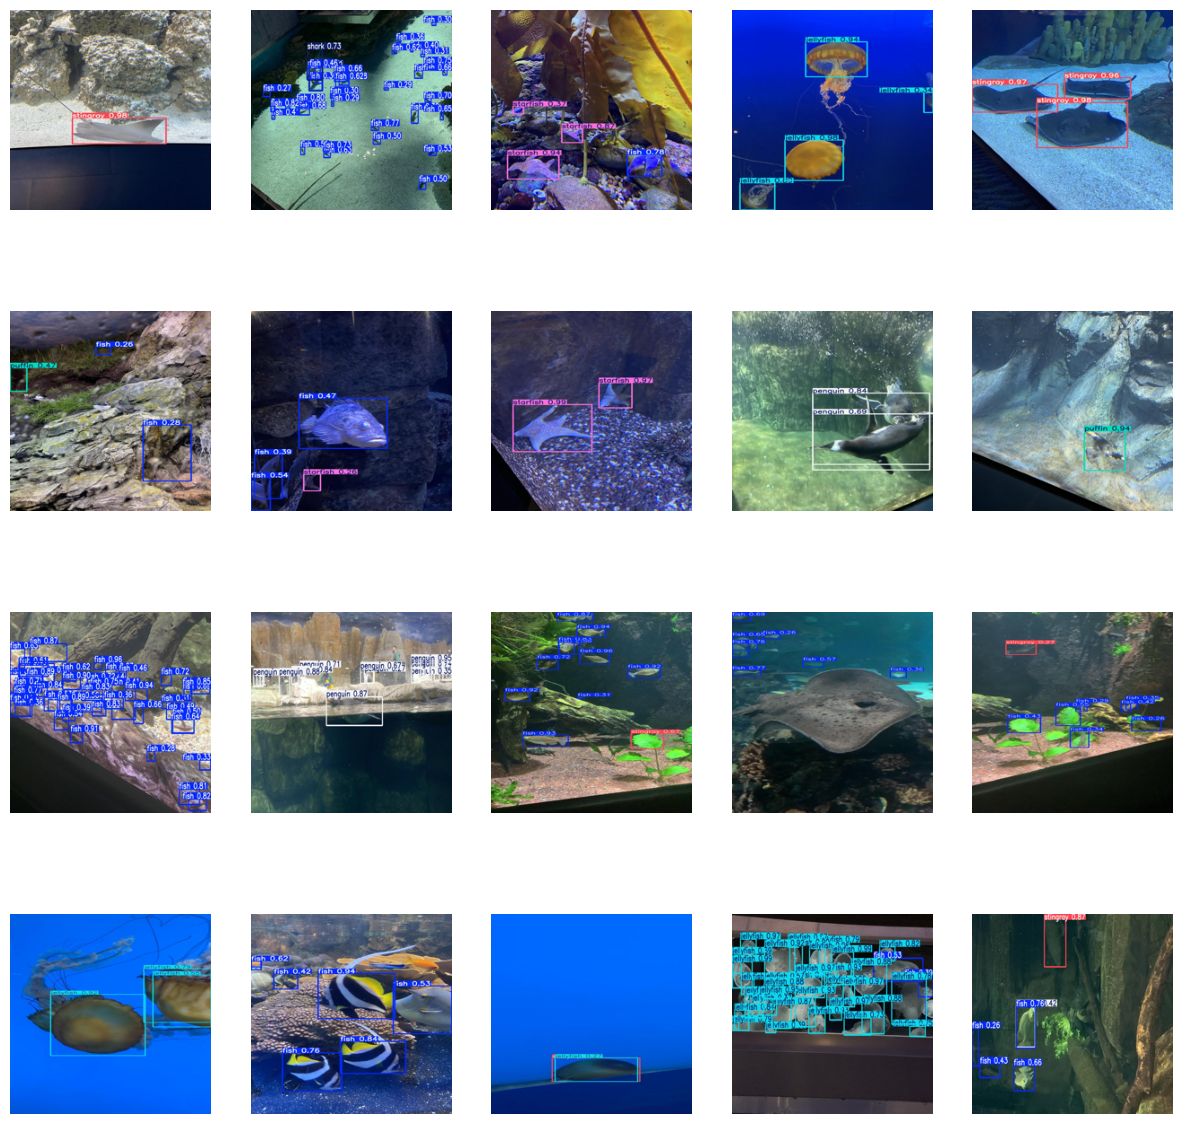

In [ ]:
annotated_images = '/content/runs/detect/predict'

display_images_grid(annotated_images, num_images=20, grid_size=(4, 5), image_size=(224, 224))


In [ ]:

model = YOLO('/content/runs/detect/train4/weights/best.pt')
metrics = model.val(data='/content/drive/MyDrive/aquarium_pretrain/data.yaml', split='test')
print(metrics)


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/aquarium_pretrain/test/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


                   all         63        584      0.851      0.635      0.758      0.473
                  fish         30        249      0.853      0.605      0.776      0.463
             jellyfish         11        154      0.904      0.791      0.879      0.556
               penguin          7         82      0.886      0.662      0.798      0.352
                puffin          6         35      0.785      0.257      0.341      0.172
                 shark         14         38      0.833      0.737      0.811      0.553
              starfish          5         11      0.931      0.727      0.932      0.624
              stingray         10         15      0.767      0.667      0.773       0.59
Speed: 1.2ms preprocess, 22.9ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: 

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_image(image_path, title=None):
    img = Image.open(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

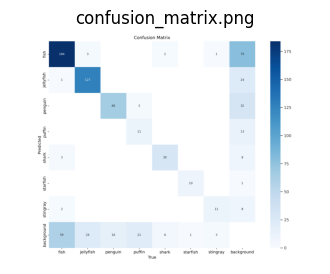

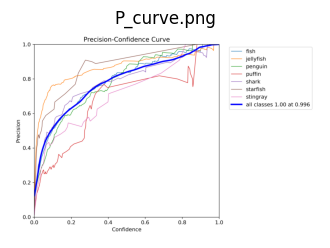

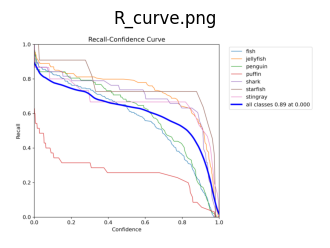

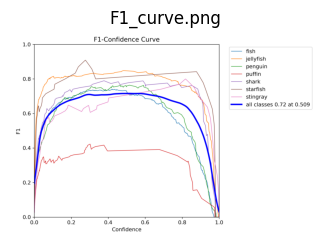

In [ ]:
results_dir = '/content/runs/detect/val3'

image_files = [
    'confusion_matrix.png',
    'P_curve.png',
    'R_curve.png',
    'F1_curve.png',
]

for image_file in image_files:
    image_path = os.path.join(results_dir, image_file)
    if os.path.exists(image_path):
        display_image(image_path, title=image_file)
    else:
        print(f"File not found: {image_path}")

To explain this confusion matrix:



* Fish: The model is great at identifying fish, making very few mistakes.


*   Jellyfish: The model does well with jellyfish too, with only a few misclassifications.

*   Penguin: The model struggles a bit with penguins, sometimes mistaking them for puffins.


*   Puffin: Puffins are also sometimes misclassified as penguins.

*   Shark: Sharks give the model some trouble, with a few being confused with starfish and stingrays.


*  Starfish: Starfish images are also a bit tricky, with some being misclassified as sharks or stingrays.

* Stingray: Stingrays are sometimes confused with sharks or starfish.


*   Background: The model has the most trouble with background images, often mixing them up with different creatures.



The model performs well leaving some area for improvement.

Potential Improvements:
1. Model Selection
2. Data Quality
3. Augmenting Data: